In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from PIL import Image

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical format
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 208s 276ms/step - loss: 0.2116 - accuracy: 0.9352 - val_loss: 0.0706 - val_accuracy: 0.9809
Epoch 2/10
750/750 [==============================] - 209s 279ms/step - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0542 - val_accuracy: 0.9841
Epoch 3/10
750/750 [==============================] - 219s 292ms/step - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0439 - val_accuracy: 0.9873
Epoch 4/10
750/750 [==============================] - 207s 277ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0485 - val_accuracy: 0.9849
Epoch 5/10
750/750 [==============================] - 275s 367ms/step - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0483 - val_accuracy: 0.9856
Epoch 6/10
750/750 [==============================] - 204s 272ms/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.0408 - val_accuracy: 0.9879
Epoch 7/10
750/750 [==============================] - 207s 276ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0453 -

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

313/313 - 1s - loss: 0.0460 - accuracy: 0.9877 - 1s/epoch - 4ms/step
Test accuracy: 0.9877


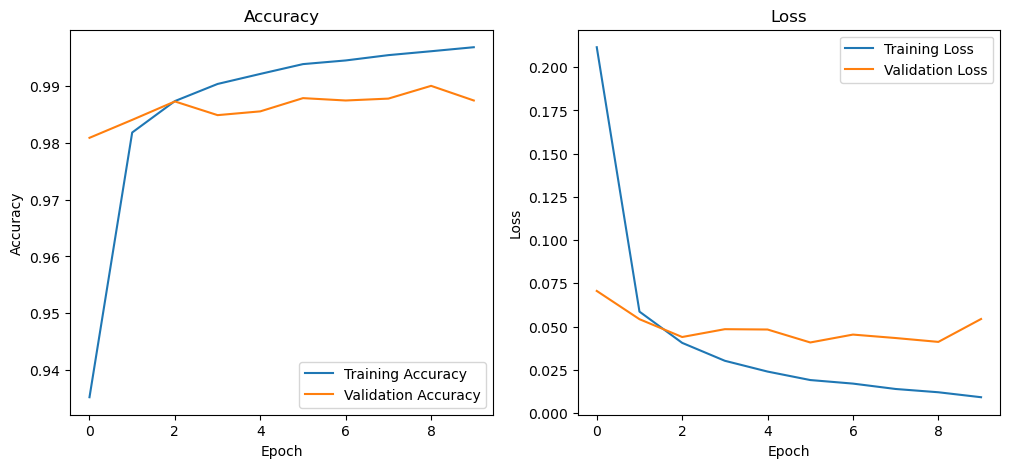

In [8]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [9]:
def load_and_preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    img = np.array(img) / 255.0  # Normalize the image
    img = img.reshape((1, 28, 28, 1))  # Reshape to (1, 28, 28, 1)
    return img

In [10]:
def predict_digit(image_path):
    # Load and preprocess the image
    img = load_and_preprocess_image(image_path)
    
    # Make a prediction
    predictions = model.predict(img)
    
    # Get the predicted digit
    predicted_digit = np.argmax(predictions)
    return predicted_digit

In [20]:
# Specify the path to the image
image_path = 'image.png'

# Predict the digit in the uploaded image
predicted_digit = predict_digit(image_path)
print(f'The predicted digit is: {predicted_digit}')

1/1 [==============================] - 0s 31ms/step
The predicted digit is: 6
